# MPG Analítica de datos
**Daniel Enrique Patiño Jaimes**

In [248]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Lectura del documento

Se le asigna nombre a cada columna para una mejor manipulación de la información

In [249]:
data = pd.read_csv('auto-mpgv2.csv')

columnas = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name']

data.columns=columnas

data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


# Utilizando la base de datos de MPG(Millas por galón)obtener un modelo  de regresión con un 𝑟!superior al 88% utilizando una entrada o varias siguiendo los siguientes requerimientos.

## Tienen que realizar un análisis de las variables para conocer si existen datos atípicos o no. En caso de confirmar su existencia deben procesarlos.

Se crea un nuevo data set en el cuál guardaremos los datos sin atípicos

In [251]:
new_dataset = data

Se evidencia que la columna 'horsepower' no fue adjuntada en la gráfica de correlación, esto debido a que contaba con datos no numéricos ('?')

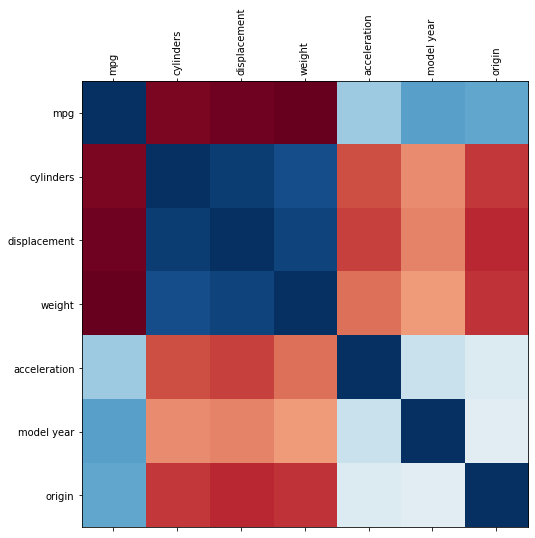

In [250]:
corr = data.corr()

fig = plt.figure(figsize=(8,8))
plt.matshow(corr,cmap = 'RdBu' ,fignum=fig.number)
plt.xticks(range(len(corr.columns)),corr.columns,rotation='vertical');
plt.yticks(range(len(corr.columns)),corr.columns);

Se identifica la posición de los datos no numéricos mencionados anteriormente y estos son guardados en una variable para su posterior procesamiento

In [252]:
hp_null=data.loc[data['horsepower']== '?']
hp_null

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


Se eliminan los datos faltantes mencionados anteriormente

In [253]:
new_dataset.drop(new_dataset.loc[new_dataset.horsepower == '?'].index, inplace=True)

Se confirma que los datos fueron eliminados correctamente

In [254]:
new_dataset.loc[new_dataset['horsepower']== '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name


Se analiza el tipo de dato que almacena la columna 'horsepower'

In [255]:
new_dataset.horsepower.describe

<bound method NDFrame.describe of 0      130
1      165
2      150
3      150
4      140
      ... 
393     86
394     52
395     84
396     79
397     82
Name: horsepower, Length: 392, dtype: object>

Se convierte a tipo float para poder graficar los datos

In [256]:
new_dataset['horsepower'] = new_dataset['horsepower'].astype('float64')

Se realizan los gráficos de cajas y bigotes para identificar que columnas cuentan con datos atípicos

mpg                AxesSubplot(0.125,0.536818;0.168478x0.343182)
cylinders       AxesSubplot(0.327174,0.536818;0.168478x0.343182)
displacement    AxesSubplot(0.529348,0.536818;0.168478x0.343182)
horsepower      AxesSubplot(0.731522,0.536818;0.168478x0.343182)
weight                AxesSubplot(0.125,0.125;0.168478x0.343182)
acceleration       AxesSubplot(0.327174,0.125;0.168478x0.343182)
model year         AxesSubplot(0.529348,0.125;0.168478x0.343182)
origin             AxesSubplot(0.731522,0.125;0.168478x0.343182)
dtype: object

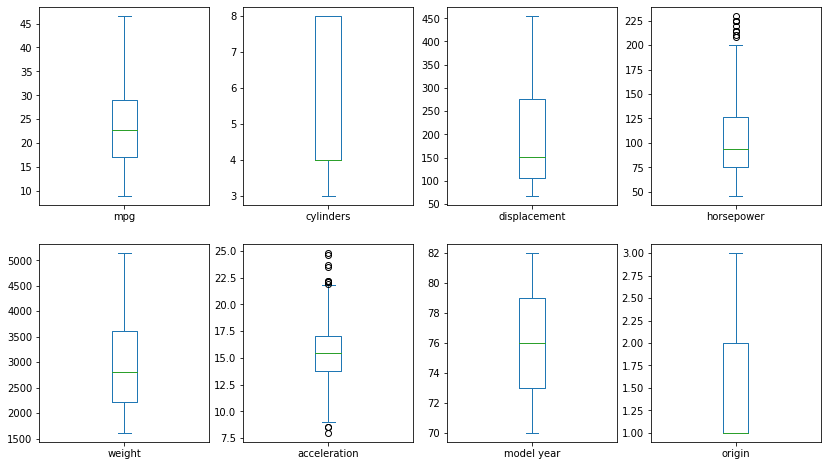

In [257]:
boxplots_cols = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin']
new_dataset[boxplots_cols].plot(kind='box',subplots=True,layout=(2,4),figsize=(14,8))

Se eliminan los atípicos de las columnas que tienen, es decir 'horsepower', 'acceleration'

In [258]:
caracteristicas = ['horsepower','acceleration']
for i in caracteristicas:
  Q1 = new_dataset[i].quantile(0.25)
  Q3 = new_dataset[i].quantile(0.75)
  IQR = Q3 - Q1
  # Entre más grande el número, más permisiva es la detección de atípicos
  u_limit = Q3 + 1.5 * IQR
  l_limit = Q1 - 1.5 * IQR
  ubicacionNoAtipicos= (new_dataset[i] >= l_limit) & (new_dataset[i]<= u_limit)
  new_dataset = new_dataset[ubicacionNoAtipicos]

new_dataset

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,151.0,90.0,2950,17.3,82,1,chevrolet camaro
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


## Deben identificar el lugar exacto de estos atípicos y guardar sus índices en una variable externa.

### Se buscan los atípicos en el dataframe original, el cuál no ha recibido ningun cambio en los datos

Se identifican los límites superior e inferior para comprobar que los datos atípicos encontrados hayan sido categorizados de manera correcta

In [259]:
Q1 = data['acceleration'].quantile(0.25)
Q3 = data['acceleration'].quantile(0.75)
IQR = Q3 - Q1
# Entre más grande el número, más permisiva es la detección de atípicos
u_limit_a = Q3 + 1.5 * IQR
l_limit_a = Q1 - 1.5 * IQR

print('Limite superior: ',u_limit_a)
print('Limite inferior: ',l_limit_a)

Limite superior:  21.899999999999995
Limite inferior:  8.900000000000002


Ubicación de los datos atípicos en la columna de 'acceleration'

In [260]:
print(np.where(data['acceleration']>u_limit_a))
print(np.where(data['acceleration']<l_limit_a))

(array([ 58, 193, 194, 207, 297, 298, 324, 388]),)
(array([ 7,  9, 11]),)


In [261]:
Q1 = data['horsepower'].quantile(0.25)
Q3 = data['horsepower'].quantile(0.75)
IQR = Q3 - Q1
# Entre más grande el número, más permisiva es la detección de atípicos
u_limit_h = Q3 + 1.5 * IQR
l_limit_h = Q1 - 1.5 * IQR

print('Limite superior: ',u_limit_h)
print('Limite inferior: ',l_limit_h)

Limite superior:  202.5
Limite inferior:  -1.5


Ubicación de los datos atípicos en la columna de 'horsepower'

In [262]:
print(np.where(data['horsepower']>u_limit_h))
print(np.where(data['horsepower']<l_limit_h))
hp_null.index.values

(array([  6,   7,   8,  13,  25,  27,  66,  93,  94, 115]),)
(array([], dtype=int64),)


array([ 32, 126, 330, 336, 354, 374])

## El entrenamiento y prueba tiene que estar dividido 60% y 40% respectivamente. 

In [263]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

df_caracteristica = new_dataset[['displacement','weight']]
df_resultado = new_dataset['cylinders']

x_train,x_test,y_train,y_test = train_test_split(df_caracteristica,df_resultado, train_size= 0.6) #test_size = porcentaje de datos para testear
modelo=LinearRegression()
modelo.fit(X=np.array(x_train), y=y_train) #Solo funciona con 'X' y 'y'
predicciones = modelo.predict(X = np.array(x_test))
r2 = r2_score(y_true = y_test, y_pred = predicciones)
print('El r2 es ',r2)

El r2 es  0.9121418804672214


## Cuantificar la cantidad de registros que existen por vehículo

In [264]:
new_dataset['car name'].value_counts()

ford pinto        5
amc matador       5
toyota corolla    5
ford maverick     4
amc hornet        4
                 ..
amc pacer         1
volvo 244dl       1
fiat 131          1
capri ii          1
chevy s-10        1
Name: car name, Length: 289, dtype: int64

# Seleccionando 5 vehículos a elección obtener una regresión por cada uno de ellos, buscando el mejor rendimiento posible. Además:

In [265]:
carro1 = new_dataset.loc[new_dataset['car name']== 'ford pinto']
carro2 = new_dataset.loc[new_dataset['car name']== 'amc matador']
carro3 = new_dataset.loc[new_dataset['car name']== 'toyota corolla']
carro4 = new_dataset.loc[new_dataset['car name']== 'ford maverick']
carro5 = new_dataset.loc[new_dataset['car name']== 'amc hornet']

## Comparar visualmente las respuestas de todas las regresiones usando un gráfico de línea o dispersión.

### Carro 1: Ford pinto

El r2 es  -0.06166648250304063


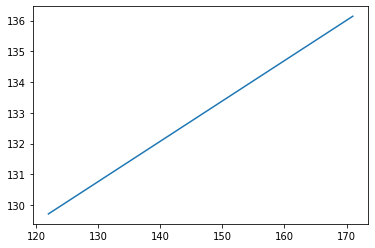

In [266]:
df_caracteristica = carro1['model year']
df_resultado = carro1['displacement']


x_train,x_test,y_train,y_test1 = train_test_split(df_caracteristica,df_resultado, train_size= 0.6) #test_size = porcentaje de datos para testear

modelo=LinearRegression()
modelo.fit(X=np.array(x_train).reshape(-1,1), y=y_train) #Solo funciona con 'X' y 'y'

predicciones1 = modelo.predict(X = np.array(x_test).reshape(-1,1))
r2 = r2_score(y_true = y_test1, y_pred = predicciones1)
print('El r2 es ',r2)
plt.plot(y_test1,predicciones1)

### Carro 2: Amc matador

El r2 es  0.0


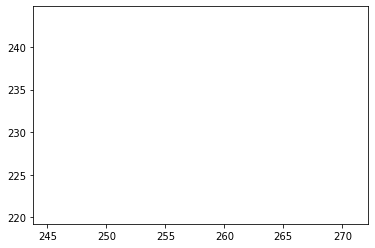

In [267]:
df_caracteristica = carro2['cylinders']
df_resultado = carro2['displacement']


x_train,x_test,y_train,y_test2 = train_test_split(df_caracteristica,df_resultado, train_size= 0.6) #test_size = porcentaje de datos para testear

modelo=LinearRegression()
modelo.fit(X=np.array(x_train).reshape(-1,1), y=y_train) #Solo funciona con 'X' y 'y'

predicciones2 = modelo.predict(X = np.array(x_test).reshape(-1,1))
r2 = r2_score(y_true = y_test2, y_pred = predicciones2)
print('El r2 es ',r2)
plt.plot(y_test2,predicciones2)

### Carro 3: Toyota corolla

El r2 es  0.038039079662391395


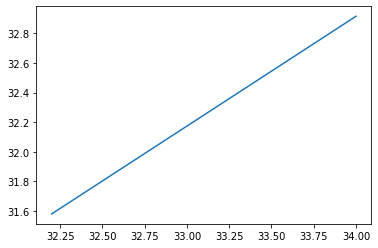

In [268]:
df_caracteristica = carro3['model year']
df_resultado = carro3['mpg']

x_train,x_test,y_train,y_test3 = train_test_split(df_caracteristica,df_resultado, train_size= 0.6) #test_size = porcentaje de datos para testear

modelo=LinearRegression()
modelo.fit(X=np.array(x_train).reshape(-1,1), y=y_train) #Solo funciona con 'X' y 'y'

predicciones3 = modelo.predict(X = np.array(x_test).reshape(-1,1))
r2 = r2_score(y_true = y_test3, y_pred = predicciones3)
print('El r2 es ',r2)
plt.plot(y_test3,predicciones3)

### Carro 4: Ford maverick

El r2 es  -3.1744444444444246


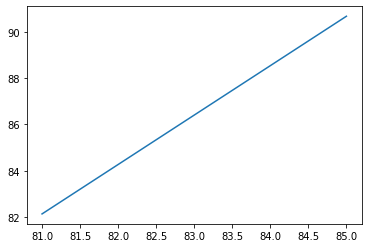

In [269]:
df_caracteristica = carro4['acceleration']
df_resultado = carro4['horsepower']


x_train,x_test,y_train,y_test4 = train_test_split(df_caracteristica,df_resultado, train_size= 0.6) #test_size = porcentaje de datos para testear

modelo=LinearRegression()
modelo.fit(X=np.array(x_train).reshape(-1,1), y=y_train) #Solo funciona con 'X' y 'y'

predicciones4 = modelo.predict(X = np.array(x_test).reshape(-1,1))
r2 = r2_score(y_true = y_test4, y_pred = predicciones4)
print('El r2 es ',r2)
plt.plot(y_test4,predicciones4)

### Carro 5: Amc hornet

El r2 es  0.0


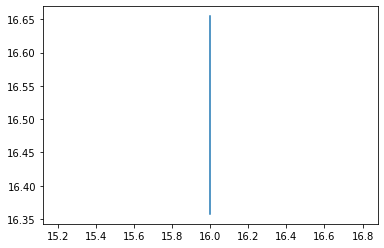

In [270]:
df_caracteristica = carro5['weight']
df_resultado = carro5['acceleration']


x_train,x_test,y_train,y_test5 = train_test_split(df_caracteristica,df_resultado, train_size= 0.6) #test_size = porcentaje de datos para testear

modelo=LinearRegression()
modelo.fit(X=np.array(x_train).reshape(-1,1), y=y_train) #Solo funciona con 'X' y 'y'

predicciones5 = modelo.predict(X = np.array(x_test).reshape(-1,1))
r2 = r2_score(y_true = y_test5, y_pred = predicciones5)
print('El r2 es ',r2)
plt.plot(y_test5,predicciones5)